# Analise de Acidentes

    Copyright (C) 2019 - Luis Vitório
    Analise de Acidentes de Trânsito

    Este programa é um software livre: você pode redistribuí-lo e/ou
    modificá-lo sob os termos da Licença Pública Geral Affero GNU,
    conforme publicado pela Free Software Foundation, seja a versão 3
    da Licença ou (a seu critério) qualquer versão posterior.

    Este programa é distribuído na esperança de que seja útil,
    mas SEM QUALQUER GARANTIA; sem a garantia implícita de
    COMERCIALIZAÇÃO OU ADEQUAÇÃO A UM DETERMINADO PROPÓSITO. Veja a
    Licença Pública Geral Affero GNU para obter mais detalhes.

    Você deve ter recebido uma cópia da Licença Pública Geral Affero GNU
    junto com este programa. Se não, veja <https://www.gnu.org/licenses/>.

    linkedin: https://www.linkedin.com/in/vitorioluis/
    email: vitorioluis@gmail.com

#### Dados obtidos de 

#### Ferramentas utilizadas para realizar o Data Analytics
<img src="./img/1.png" >

In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
%matplotlib inline

## Fase 1
#### Importar e tratar os dados

In [2]:
# arquivo por formato
def filtrar_arquivo(tipo):
    path = './'
    lst_arq = os.listdir(path) # listando novamente o diretório para verificar arquivos csv
    return [arq for arq in lst_arq if arq[-3:] == tipo]

# Separa arquivo zip caso haja outros tipos de arquivo na pasta
lst_zip = filtrar_arquivo('zip')

# extrair arquivos do zip para trabalhar
for zp in lst_zip:
    fzp = zipfile.ZipFile(zp)
    fzp.extractall('./') 
    fzp.close()

# Separa arquivo csv caso haja outros tipos de arquivo no diretório
lst_csv = filtrar_arquivo('csv')

# criar dataframe vazio para unir as bases
df_acidentes = pd.DataFrame()

# É hora de ler os arquivos csv e consolidar no dataframe
for csv in lst_csv:
    df = pd.read_csv(csv, sep=';', encoding='latin1')
    df_acidentes = df.append(df)
    os.remove(csv)

In [3]:
# verificar se está tudo ok
df_acidentes.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,8,1.0,2017-01-01,domingo,00:00:00,PR,376.0,112,PARANAVAI ...,Sim,...,Masculino,0,0,1,0,-23.098807,-52.387894,SR-PR,DEL7/7,UOP05/PR
1,9,955.0,2017-01-01,domingo,00:01:00,SC,101.0,234,PALHOCA ...,Sim,...,Masculino,1,0,0,0,-27.810100,-48.635700,SR-SC,DEL8/1,UOP02/SC
2,11,2.0,2017-01-01,domingo,00:00:00,PR,153.0,"56,9",SANTO ANTONIO DA PLATINA ...,Sim,...,Feminino,0,1,0,0,-23.369520,309.935131,SR-PR,DEL7/7,UOP07/PR
3,11,3.0,2017-01-01,domingo,00:00:00,PR,153.0,"56,9",SANTO ANTONIO DA PLATINA ...,Sim,...,Masculino,0,1,0,0,-23.369520,309.935131,SR-PR,DEL7/7,UOP07/PR
4,12,1499.0,2017-01-01,domingo,00:00:00,GO,153.0,435,ANAPOLIS ...,Sim,...,Masculino,0,0,1,0,-16.274737,-48.969090,SR-GO,DEL1/2,UOP01/GO


In [5]:
# quantidades de linhas e colunas
df_acidentes.shape

(408578, 37)

##### Nosso conjunto de dados contém 270.912 linhas divididas em 37 colunas

In [6]:
# nome das colunas
df_acidentes.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [7]:
# informações sobre tipos de campos, e dados faltantes
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408578 entries, 0 to 204288
Data columns (total 37 columns):
id                        408578 non-null int64
pesid                     408576 non-null float64
data_inversa              408578 non-null object
dia_semana                408578 non-null object
horario                   408578 non-null object
uf                        408578 non-null object
br                        407930 non-null float64
km                        407930 non-null object
municipio                 408578 non-null object
causa_principal           408578 non-null object
causa_acidente            408578 non-null object
ordem_tipo_acidente       408578 non-null int64
tipo_acidente             408578 non-null object
classificacao_acidente    408578 non-null object
fase_dia                  408578 non-null object
sentido_via               408578 non-null object
condicao_metereologica    408578 non-null object
tipo_pista                408578 non-null object
tracado

In [8]:
df_acidentes.tail()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
204284,133740,289034.0,2017-02-10,sexta-feira,15:50:00,MG,50.0,61,ARAGUARI ...,Sim,...,Masculino,0,1,0,0,-18.810509,-48.246160,SR-MG,DEL4/17,UOP02/MG
204285,133740,289033.0,2017-02-10,sexta-feira,15:50:00,MG,50.0,61,ARAGUARI ...,Sim,...,Masculino,0,1,0,0,-18.810509,-48.246160,SR-MG,DEL4/17,UOP02/MG
204286,133740,289031.0,2017-02-10,sexta-feira,15:50:00,MG,50.0,61,ARAGUARI ...,Sim,...,Feminino,0,1,0,0,-18.810509,-48.246160,SR-MG,DEL4/17,UOP02/MG
204287,133958,289356.0,2017-12-20,quarta-feira,05:00:00,PE,408.0,84,SAO LOURENCO DA MATA ...,Sim,...,Masculino,0,1,0,0,-7.958815,-35.097381,SR-PE,DEL11/1,UOP01/PE
204288,133958,289358.0,2017-12-20,quarta-feira,05:00:00,PE,408.0,84,SAO LOURENCO DA MATA ...,Sim,...,Masculino,0,1,0,0,-7.958815,-35.097381,SR-PE,DEL11/1,UOP01/PE


In [9]:
# plot de calor adaptado para verificar dados faltantes em amarelo
def grafico_dados_faltantes():
    plt.figure(figsize=(15,10))
    return sns.heatmap(df_acidentes.isnull(), yticklabels=False, cbar=False, cmap='viridis');

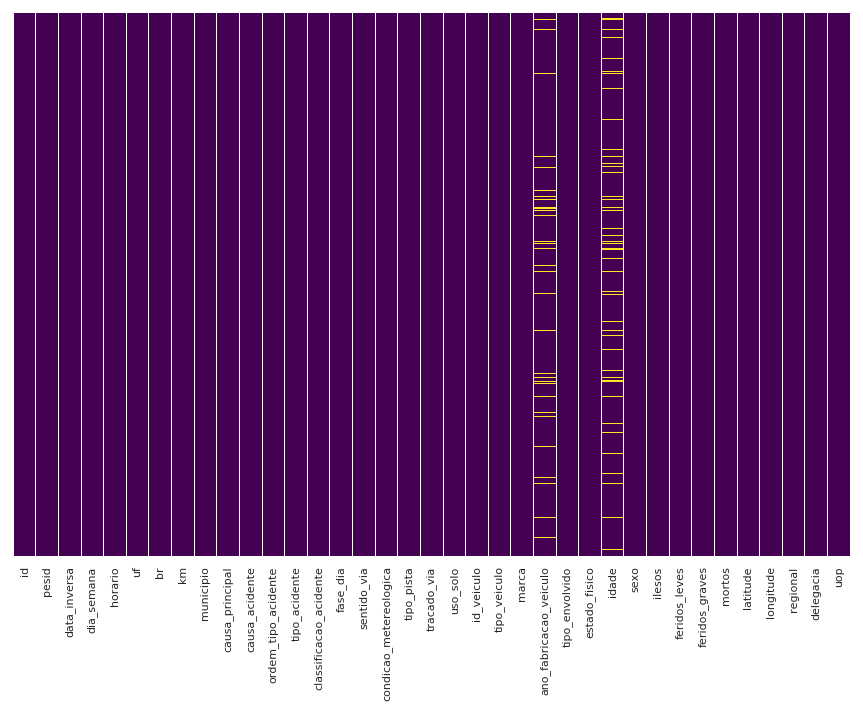

In [10]:
grafico_dados_faltantes();

##### No gráfico acima podemos observar os dados faltantes em amarelo, apenas 4 colunas contém dados faltantes:
#####   * "br" => Nome da rodovia
#####   * "km" => kilômetro onde aconteceu o acident 
#####   * "idade" => idade do contutor do veículo
#####   * "ano_fabricacao_veiculo" => como o próprio nome ja diz ano de fabricação do veículo

In [11]:
# Aplica a média de idade para preencher os dados faltandes da coluna "idade"
df_acidentes['idade'].fillna((df_acidentes['idade'].mean(skipna=True)),inplace=True)

# gerar a média do ano de fabricação
ano_medio_fabricacao = int(df_acidentes['ano_fabricacao_veiculo'].mean())

# tratando o ano médio de fabricação do veículo
df_acidentes['ano_fabricacao_veiculo'].fillna((ano_medio_fabricacao), inplace=True);

# tratando o campo 'br' que não estão preenchidas
# subistitui o Nulo por Zero(0)
df_acidentes['br'] = df_acidentes['br'].fillna(0) 

# converte em inteiro para remover casa decimal
df_acidentes['br'] = df_acidentes['br'].astype(int)

# converte em str
df_acidentes['br'] = df_acidentes['br'].astype(str) 

# preenche os campos de valores Zero(0) 
df_acidentes.loc[df_acidentes['br'] == '0','br'] = 'Nome da BR não preenchido' 

# normalizando dados(coluna br com o tamanho de 3 caracteres)
df_acidentes['br'] = df_acidentes['br'].apply(lambda n: '0' * (3 - len(n)) + n if len(n) < 3 else n); 

# converte em str e substitui ',' por '.' para em seguida converter em float
df_acidentes['km']=df_acidentes['km'].apply(lambda x: str(x).replace(".","").replace(",","."))

# converte em float
df_acidentes['km'] = df_acidentes['km'].astype(float)

# aplica a média do km nos campos vazios
df_acidentes['km'].fillna((df_acidentes['km'].mean(skipna=True)),inplace=True)

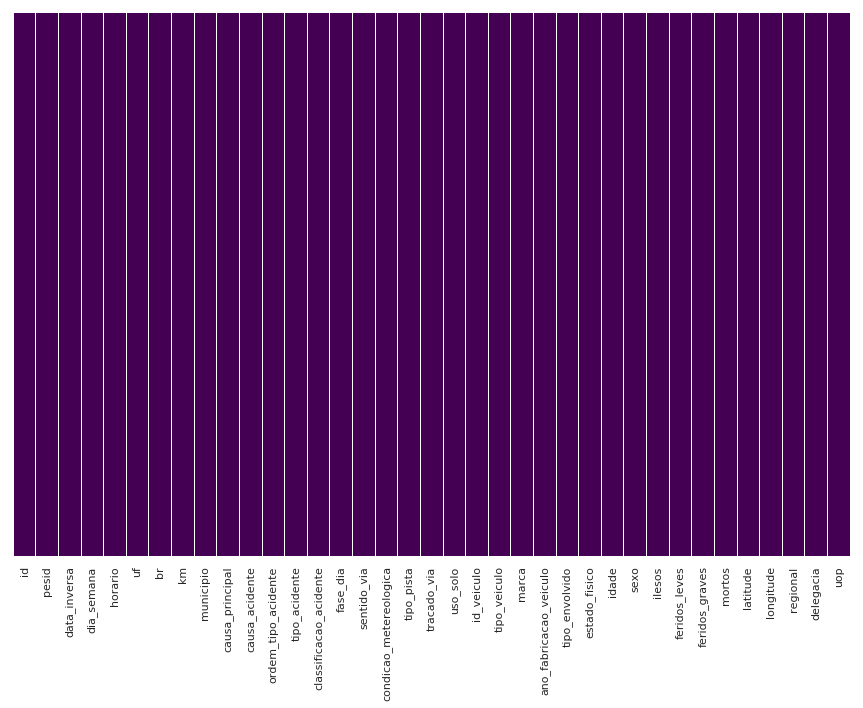

In [12]:
grafico_dados_faltantes();

#### Agora que normalizamos nossos dados e não temos dados faltantes como podemos observar no gráfico, seguiremos para próxima fase.

## Fase 2

### Conhecer/Explorar os dados

##### Para não precisar toda hora ficar digitando a mesma coisa em graficos uma função básica para gerar gráfico 

In [13]:
# total de linha que contém no dataframe
ncount = len(df_acidentes)

In [17]:
def faixa_etaria(idade):
    if idade <= 10:
        _faixa = '0-10'
    elif idade <= 20:
        _faixa = '11-20'    
    elif idade <= 30:
        _faixa = '21-30'
    elif idade <= 40:
        _faixa = '31-40'
    elif idade <= 50:
        _faixa = '41-50'
    elif idade <= 60:
        _faixa = '51-60'
    elif idade <= 70:
        _faixa = '61-70'
    else:
        _faixa = '+70'
    return _faixa

In [18]:
df_acidentes['faixa_etaria']=df_acidentes['idade'].apply(faixa_etaria)

In [19]:

# função para gerar gráfico padrão
def gerar_grafico_padrao(campo, largura=10, altura=14, df = df_acidentes,titulo='Acidentes'):
    
    ax = df[campo].value_counts().plot(kind='barh', figsize=(largura, altura), fontsize=13, );
    ax.set_alpha(0.8)
    ax.set_xlabel('Números de Acidentes')
    ax.set_title(titulo)
    ax.set_xticks(np.arange(0, 110, 10)*len(df)/100)
    totals = []

    # encontrar os valores e acrescentar à lista
    for i in ax.patches:
        totals.append(i.get_width())
    
    # definir barras individuais usando a lista acima
    total = sum(totals)

    # definir barras individuais usando a lista acima
    for i in ax.patches:
        ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()/total)*100, 2))+'%', fontsize=12, color='dimgrey')

    # invertido para maior no topo
    ax.invert_yaxis()

    return ax
    

##### Nesta etapa da nossa analise vamos conhecer bem que temos em nossa base de dados, vamos gerar uma série de gráficos buscando por insights.

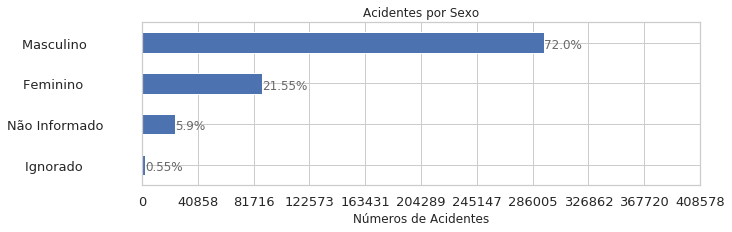

In [20]:
# acidentes por sexo
gerar_grafico_padrao('sexo', altura=3, titulo="Acidentes por Sexo");

##### Tem imagens que 'fala' mais que mil palavras, esse gráfico é um dessas imagem. Os acidentes ocorrido com homens ao volante é mais de 3 vezes maior que os com mulheres ao volante.

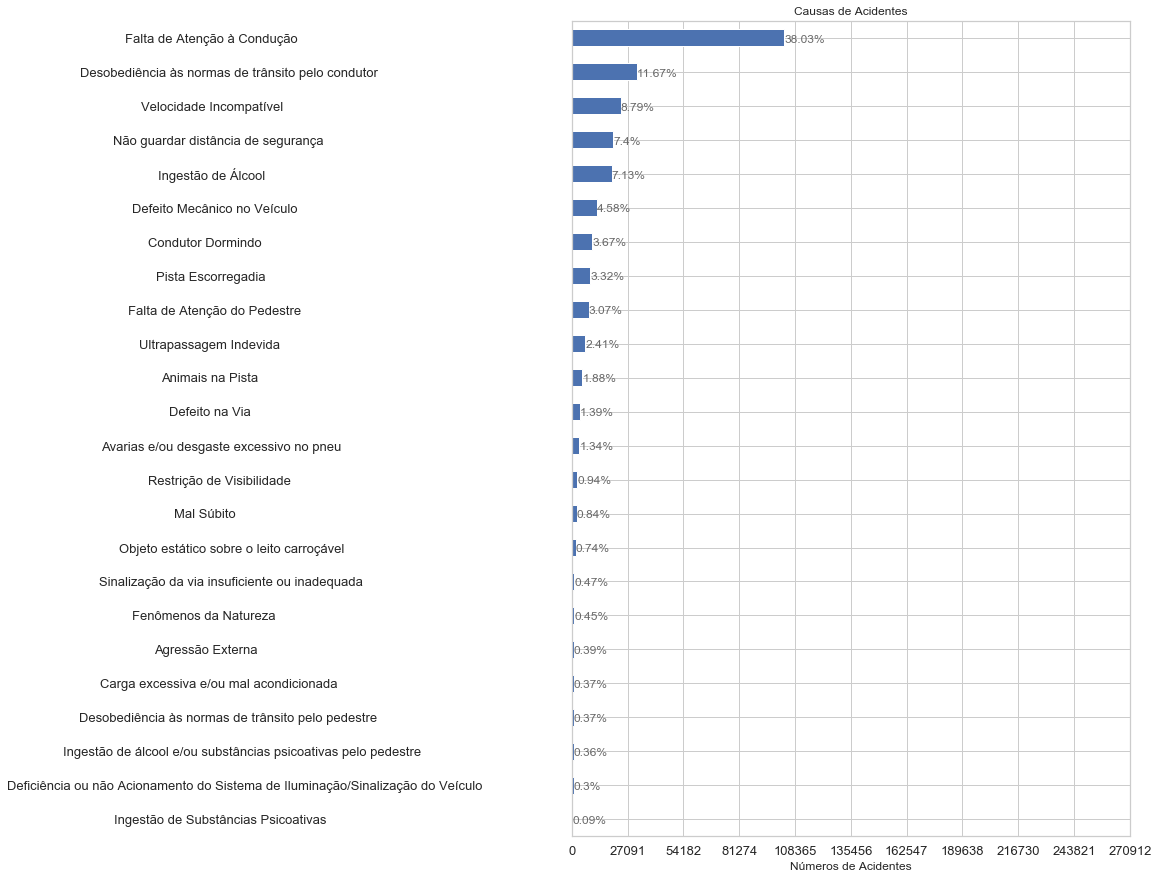

In [14]:
# Gráfico por causa de acidentes.
gerar_grafico_padrao('causa_acidente', altura = 15, largura=10, titulo='Causas de Acidentes');

##### Neste gráfico a categoria "Falta de atenção à condução" é esmagadora estou até surpreso com tamanha desproporção.

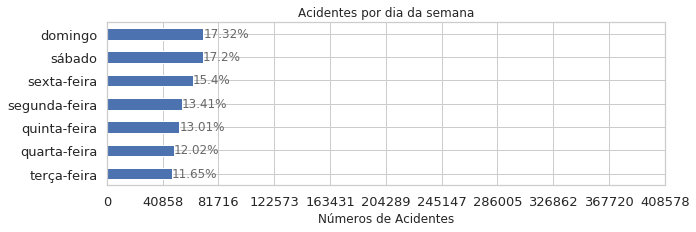

In [12]:
gerar_grafico_padrao('dia_semana', altura=3, largura=10, titulo='Acidentes por dia da semana');

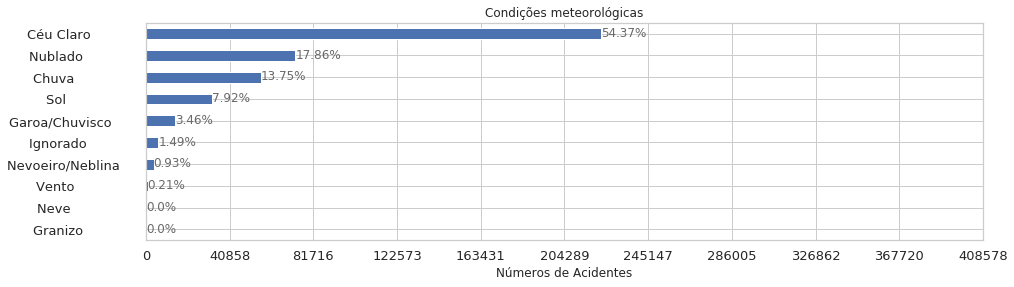

In [13]:
gerar_grafico_padrao('condicao_metereologica', altura=4, largura=15, titulo='Condições meteorológicas');

#### Este gráfico acima para mim é uma surpresa, em condições normais o número de acidentes é muito maior do que em condições adiversas.

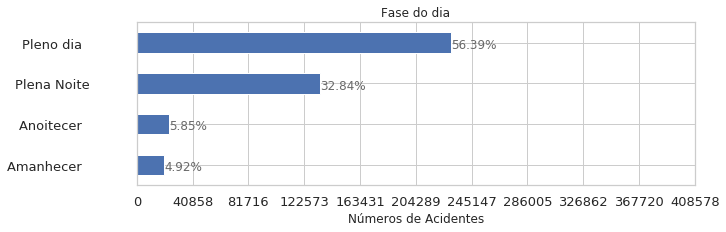

In [14]:
gerar_grafico_padrao('fase_dia', altura = 3, titulo= 'Fase do dia');

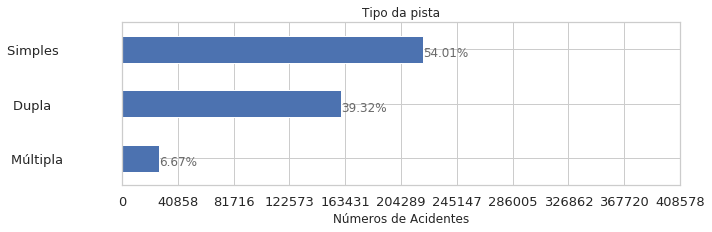

In [15]:
gerar_grafico_padrao('tipo_pista', altura = 3, titulo = 'Tipo da pista');

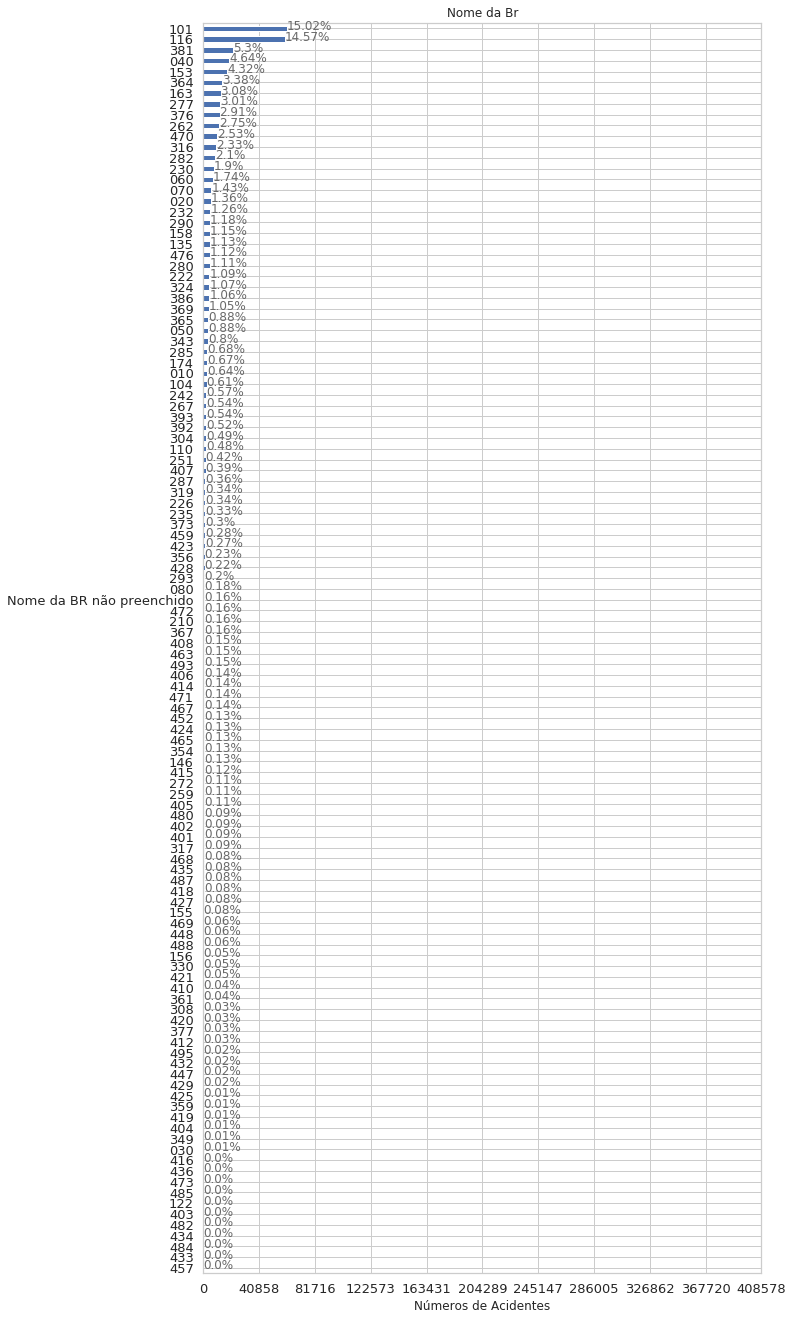

In [16]:
gerar_grafico_padrao('br', largura=10, altura=23, titulo='Nome da Br');

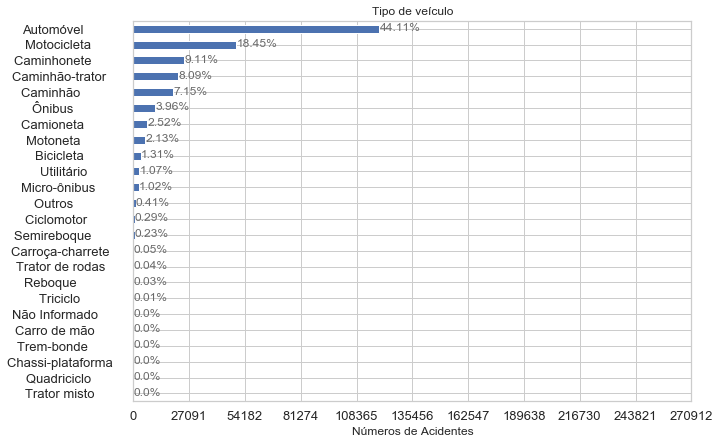

In [21]:
gerar_grafico_padrao('tipo_veiculo', altura=7,titulo='Tipo de veículo');

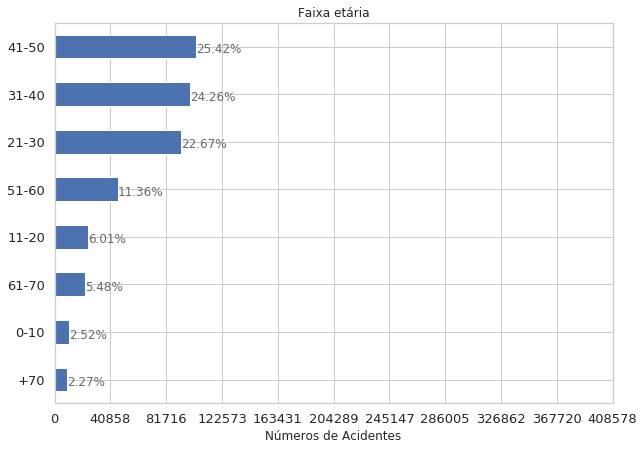

In [54]:
gerar_grafico_padrao('faixa_etaria', altura=7,titulo='Faixa etária');

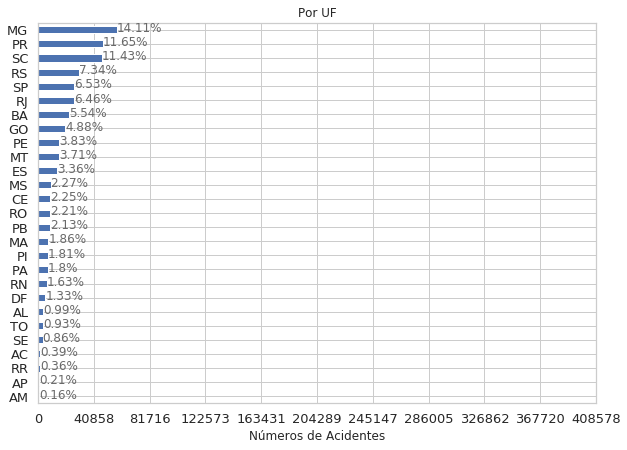

In [57]:
gerar_grafico_padrao('uf', altura=7,titulo='Por UF');

In [47]:
df_acidentes.idade.describe()

count    408578.000000
mean         42.381859
std          81.715481
min          -1.000000
25%          28.000000
50%          38.000000
75%          47.000000
max        2016.000000
Name: idade, dtype: float64

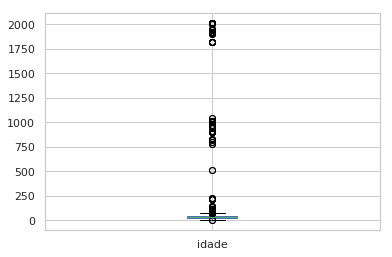

In [50]:
df_acidentes.boxplot(column=['idade'])

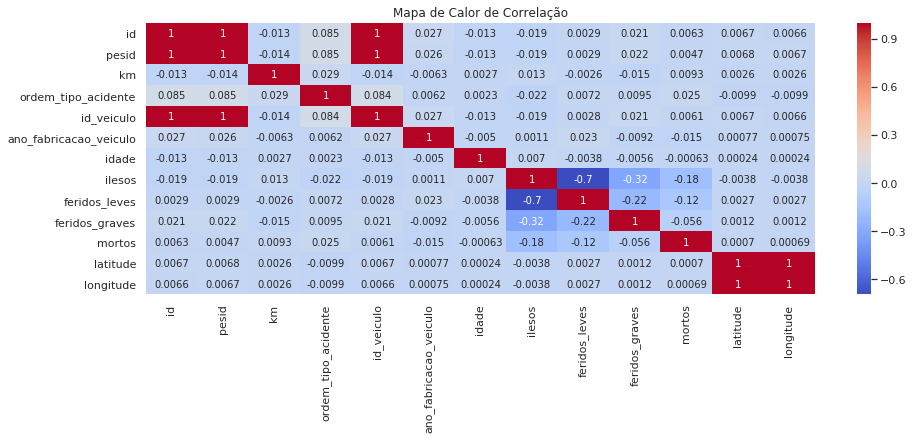

In [45]:
# correlação entre todas as variáveis do nosso dataframe.
plt.figure(figsize=(15,5))
sns.heatmap(df_acidentes.corr(), cmap='coolwarm', annot=True)
plt.title('Mapa de Calor de Correlação');

In [43]:
# Depos de tentar filtar por tipo_veiculo varias vezes não conseguir resultado me ocorreu de verificar 
# como estava os dados e para minha surpresa continha espaço no final 
df_acidentes.tipo_veiculo.unique()

array(['Motocicleta', 'Automóvel', 'Motoneta', 'Caminhão', 'Caminhonete',
       'Utilitário', 'Camioneta', 'Caminhão-trator', 'Carroça-charrete',
       'Bicicleta', 'Semireboque', 'Micro-ônibus', 'Ônibus', 'Outros',
       'Reboque', 'Ciclomotor', 'Trator de rodas', 'Não Informado',
       'Trator misto', 'Carro de mão', 'Trem-bonde', 'Triciclo',
       'Chassi-plataforma', 'Trator de esteira', 'Quadriciclo'],
      dtype=object)

In [19]:
# Vamos resolver isso aplicando um strip na coluna
df_acidentes['tipo_veiculo'] = df_acidentes['tipo_veiculo'].apply(lambda x : str(x).strip());
df_acidentes.tipo_veiculo.unique()

array(['Motocicleta', 'Automóvel', 'Motoneta', 'Caminhão', 'Caminhonete',
       'Utilitário', 'Camioneta', 'Caminhão-trator', 'Carroça-charrete',
       'Bicicleta', 'Semireboque', 'Micro-ônibus', 'Ônibus', 'Outros',
       'Reboque', 'Ciclomotor', 'Trator de rodas', 'Não Informado',
       'Trator misto', 'Carro de mão', 'Trem-bonde', 'Triciclo',
       'Chassi-plataforma', 'Trator de esteira', 'Quadriciclo'],
      dtype=object)

In [20]:
# Agora sim vamos separar acidentes ocorrido motocicletas
df_motos = df_acidentes.loc[df_acidentes.tipo_veiculo == 'Motocicleta']
df_motos.shape

(64004, 37)

In [21]:
df_motos.tail()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
204272,133211,287965.0,2017-12-01,sexta-feira,16:50:00,PI,343,342.5,TERESINA ...,Sim,...,Feminino,0,0,1,0,-5.086990,-42.757564,SR-PI,DEL17/1,UOP01/PI
204273,133211,287963.0,2017-12-01,sexta-feira,16:50:00,PI,343,342.5,TERESINA ...,Sim,...,Masculino,0,0,1,0,-5.086990,-42.757564,SR-PI,DEL17/1,UOP01/PI
204275,133285,288136.0,2017-09-10,domingo,11:50:00,AL,316,242.0,ATALAIA ...,Sim,...,Masculino,0,0,1,0,-9.508500,-36.017100,SR-AL,DEL13/1,UOP01/AL
204277,133485,288527.0,2017-10-18,quarta-feira,17:20:00,PR,277,5.0,PARANAGUA ...,Sim,...,Feminino,0,1,0,0,-25.530448,-48.528874,SR-PR,DEL7/1,UOP07/PR
204278,133485,288526.0,2017-10-18,quarta-feira,17:20:00,PR,277,5.0,PARANAGUA ...,Sim,...,Masculino,0,1,0,0,-25.530448,-48.528874,SR-PR,DEL7/1,UOP07/PR
